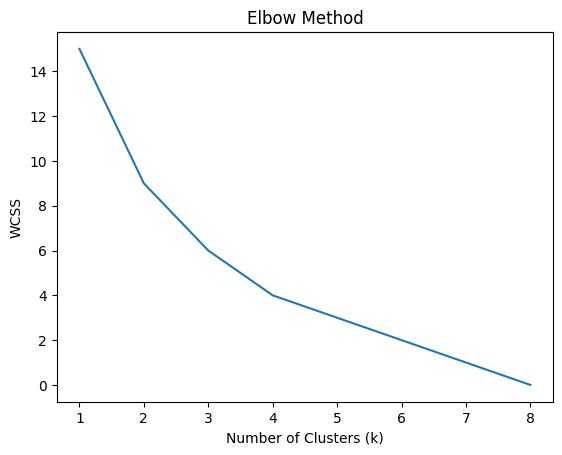

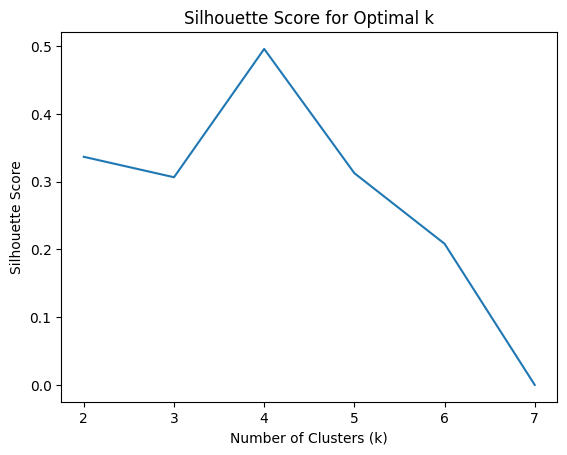

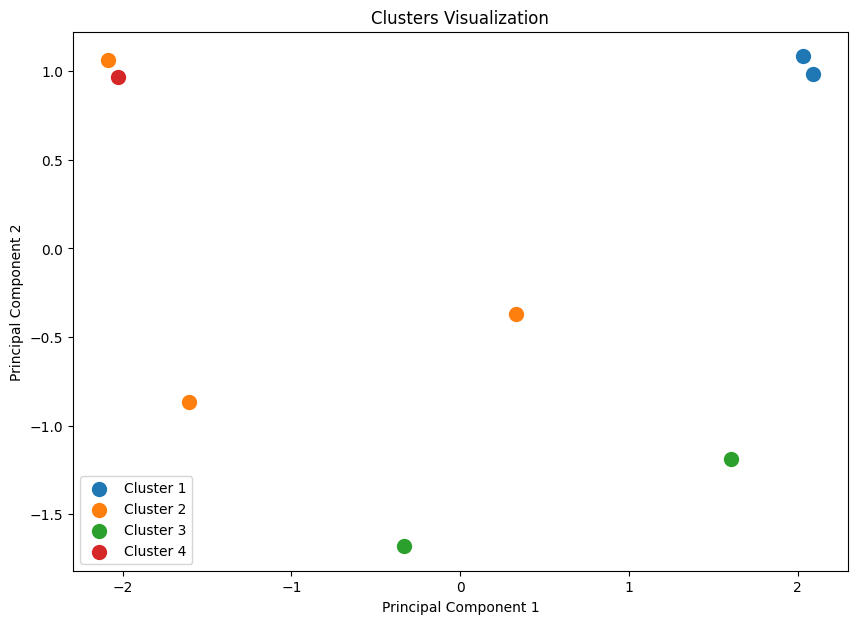

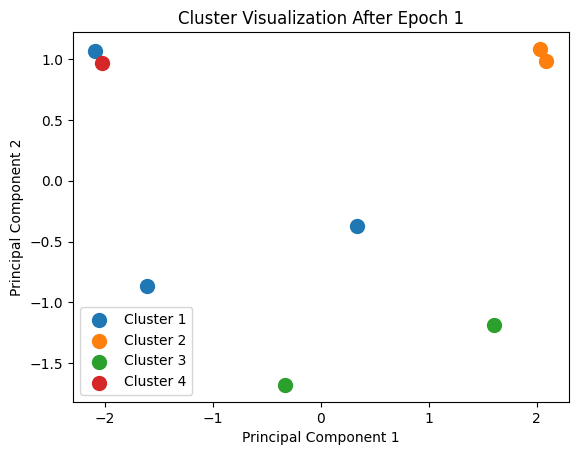

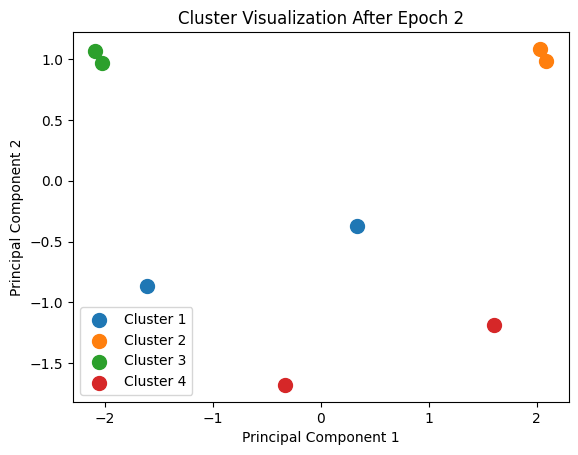

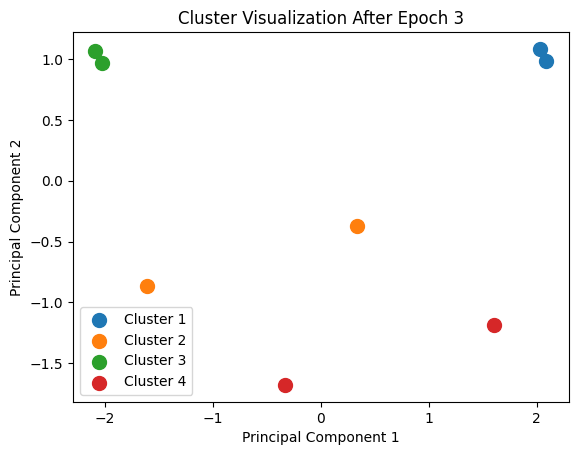

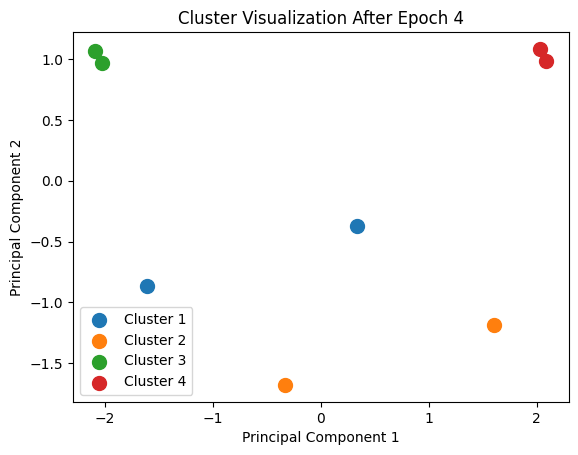

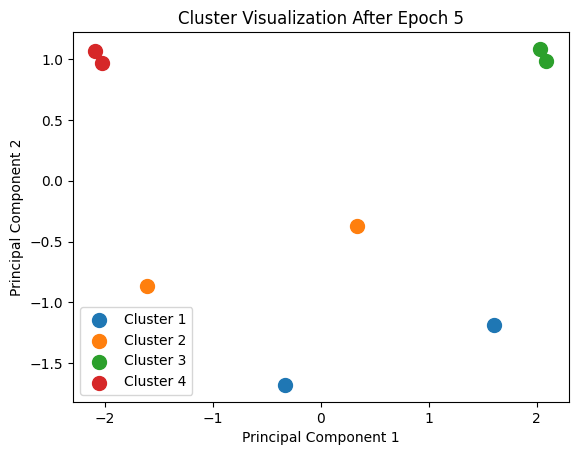

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Importing Dataset
dataset = pd.read_csv('dataset.csv')

# Encoding Categorical Values
feature_label_encoders = {}
for column in dataset:
    if(dataset[column].dtype == 'object'):
        le = LabelEncoder()
        dataset[column] = le.fit_transform(dataset[column])
        feature_label_encoders[column] = le
X = dataset.values

# Determine optimal k using Elbow and Silhouette methods
# Elbow Method
wcss = []
k_values = range(1, 9)
for k in k_values:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    kmodes.fit(X)
    cost = kmodes.cost_
    wcss.append(cost)

plt.plot(k_values, wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Silhouette Score Method
silhouette_scores = []
k_values = range(2, 8)
for k in k_values:
    kmodes = KModes(n_clusters=k, init='Huang', n_init=5, verbose=0)
    clusters = kmodes.fit_predict(X)
    silhouette_avg = silhouette_score(X, clusters, metric='hamming')
    silhouette_scores.append(silhouette_avg)

plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

# Visualize the clusters

# Apply K-Modes with the optimal k
optimal_k = 4
kmodes = KModes(n_clusters=optimal_k, init='Huang', n_init=5, verbose=0)
clusters = kmodes.fit_predict(X)

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Visualizing Clusters
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    plt.scatter(X_reduced[clusters == cluster, 0], X_reduced[clusters == cluster, 1], 
                label=f'Cluster {cluster + 1}', s=100)
    
plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Task 3: Track and visualize clustering progress

class KModesWithEpochs(KModes):
    def fit_predict_with_epochs(self, X, max_iter):
        self.epochs_ = []
        self.labels_ = None
        for _ in range(max_iter):
            self.labels_ = super().fit_predict(X)
            self.epochs_.append(self.labels_)
        return self.labels_

kmodes_epochs = KModesWithEpochs(n_clusters=optimal_k, init='Huang', n_init=5, verbose=0)
labels = kmodes_epochs.fit_predict_with_epochs(X, 5)

# Visualization after each "epoch" with legend
for i, epoch_labels in enumerate(kmodes_epochs.epochs_):
    for cluster in range(optimal_k):
        plt.scatter(X_reduced[epoch_labels == cluster, 0], X_reduced[epoch_labels == cluster, 1], 
                    label=f'Cluster {cluster + 1}', s=100)
    plt.title(f'Cluster Visualization After Epoch {i+1}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()